In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\nithin padmanabhan\Downloads\ictak data science\assignment and case study\assignment 6\New_titanic_dataset_1_-_Copy-1.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### filling null values and removing unnecessory columns

In [6]:
data=data.drop(['PassengerId','Name'],axis=1)

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data=data.drop(['Cabin','Ticket'],axis=1)

In [9]:
data.shape

(891, 8)

In [10]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

<Figure size 1000x1000 with 0 Axes>

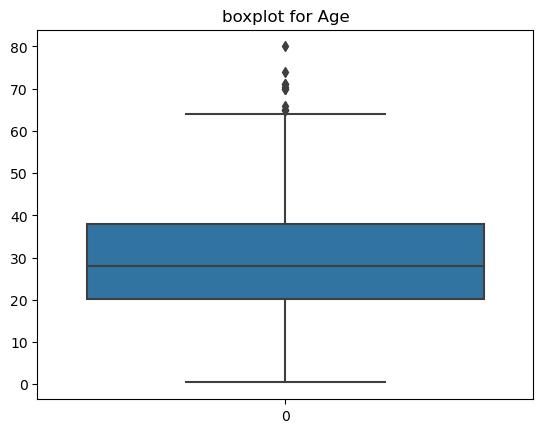

<Figure size 1000x1000 with 0 Axes>

In [11]:
sns.boxplot(data['Age'])
plt.title('boxplot for Age')
plt.figure(figsize=(10,10))

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
data=pd.get_dummies(data)

In [17]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
x= data.drop('Survived',axis = 1)
y= data['Survived']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [21]:
metric_k=[]
neighbors=np.arange(3,15)

In [22]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    knn_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,knn_predictions)
    metric_k.append(acc)

In [23]:
print(metric_k)

[0.7206703910614525, 0.7094972067039106, 0.7262569832402235, 0.7374301675977654, 0.7318435754189944, 0.7262569832402235, 0.7262569832402235, 0.7206703910614525, 0.7430167597765364, 0.7094972067039106, 0.7150837988826816, 0.7262569832402235]


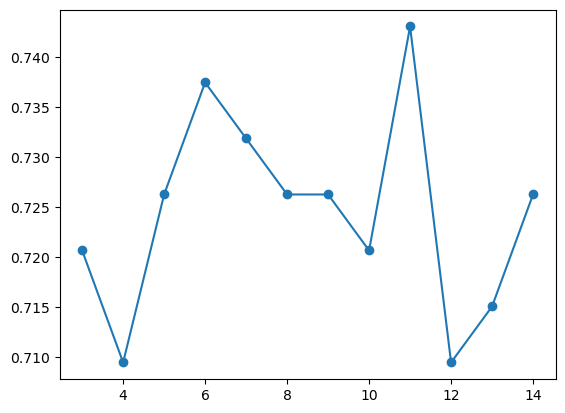

In [24]:
plt.plot(neighbors,metric_k,'o-')

In [25]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [26]:
score_knn=classifier.score(x_test,y_test)

In [27]:
score_knn

0.7430167597765364

### KNN - K-Fold Cross Validation

In [28]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [29]:
from sklearn.model_selection import cross_val_score
cv_knn=cross_val_score(classifier,x,y,cv=kfold_validator)

In [30]:
cv_knn

array([0.66666667, 0.6741573 , 0.66292135, 0.70786517, 0.68539326,
       0.75280899, 0.71910112, 0.73033708, 0.76404494, 0.76404494])

In [31]:
np.mean(cv_knn)

0.7127340823970038

### KNN - Stratified Cross Validation

In [32]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [33]:
cv_knn=cross_val_score(classifier,x,y,cv=skfold_validator)

In [34]:
cv_knn

array([0.65555556, 0.61797753, 0.62921348, 0.76404494, 0.70786517,
       0.69662921, 0.75280899, 0.73033708, 0.73033708, 0.75280899])

In [35]:
np.mean(cv_knn)

0.7037578027465667

### SVM

In [36]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
score_svm=svmclf.score(x_test,y_test)

In [38]:
score_svm

0.7821229050279329

### SVM - K-Fold Cross Validation

In [39]:
cv_svm=cross_val_score(svmclf,x,y,cv=kfold_validator)

In [40]:
cv_svm

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [41]:
np.mean(cv_svm)

0.786729088639201

### KNN - Stratified Cross Validation

In [42]:
cv_svm=cross_val_score(classifier,x,y,cv=skfold_validator)

In [43]:
cv_svm

array([0.65555556, 0.61797753, 0.62921348, 0.76404494, 0.70786517,
       0.69662921, 0.75280899, 0.73033708, 0.73033708, 0.75280899])

In [44]:
np.mean(cv_svm)

0.7037578027465667